# Business case

* Predict the outcome of a baseball game based on match metrics (other than the score)
* Helping the team focus on the right skills to train for as well as chosing the right game strategy

* create 'historical' model then deploy it for a team specifically


## Further work

* Deploy and fine tune model to a specific team
* Be able to identify the players that "match the model"


In [51]:
import pandas as pd
import seaborn as sns

In [52]:
df = pd.read_csv('MLB-GameLogs-1871_2016.csv')
df

/home/antoine/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,14,19,85,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


date  number_of_game day_of_week v_name v_league  v_game_number  \
0      19460416               0         Tue    SLA       AL              1   
1      19460416               0         Tue    NYA       AL              1   
2      19460416               0         Tue    BOS       AL              1   
3      19460416               0         Tue    CLE       AL              1   
4      19460416               0         Tue    BRO       NL              1   
...         ...             ...         ...    ...      ...            ...   
94927  20161002               0         Sun    MIL       NL            162   
94928  20161002               0         Sun    NYN       NL            162   
94929  20161002               0         Sun    LAN       NL            162   
94930  20161002               0         Sun    PIT       NL            162   
94931  20161002               0         Sun    MIA       NL            161   

      h_name h_league  h_game_number  v_score  ...  h_player_7_name  \
0        DET       AL              1        1  ...    Pinky Higgins   
1        PHA       AL              1        5  ...      George Kell   
2        WS1       AL              1        6  ...     Jerry Priddy   
3        CHA       AL              1        1  ...   Thurman Tucker   
4        BSN       NL              1        3  ...   Skippy Roberge   
...      ...      ...            ...      ...  ...              ...   
94927    COL       NL            162        6  ...      Pat Valaika   
94928    PHI       NL            162        2  ...    Andres Blanco   
94929    SFN       NL            162        1  ...        Joe Panik   
94930    SLN       NL            162        4  ...      Jedd Gyorko   
94931    WAS       NL            162        7  ...   Danny Espinosa   

       h_player_7_def_pos h_player_8_id   h_player_8_name h_player_8_def_pos  \
0                     5.0      richp101     Paul Richards                2.0   
1                     5.0      handg101      Gene Handley                4.0   
2                     4.0      evana101          Al Evans                2.0   
3                     8.0      tresm101        Mike Tresh                2.0   
4                     5.0      culld101       Dick Culler                6.0   
...                   ...           ...               ...                ...   
94927                 4.0      adamc001  Cristhian Adames                6.0   
94928                 6.0      altha001     Aaron Altherr                9.0   
94929                 4.0      gillc001   Conor Gillaspie                5.0   
94930                 4.0      gricr001    Randal Grichuk                8.0   
94931                 6.0      lobaj001      Jose Lobaton                2.0   

      h_player_9_id   h_player_9_name  h_player_9_def_pos  additional_info  \
0          newhh101     Hal Newhouser                 1.0              NaN   
1          chrir101  Russ Christopher                 1.0              NaN   
2          wolfr102       Roger Wolff                 1.0              NaN   
3          dietb101     Bill Dietrich                 1.0              NaN   
4          sainj101       Johnny Sain                 1.0              NaN   
...             ...               ...                 ...              ...   
94927      marqg001    German Marquez                 1.0              NaN   
94928      eickj001    Jerad Eickhoff                 1.0              NaN   
94929      moorm003        Matt Moore                 1.0              NaN   
94930      waina001   Adam Wainwright                 1.0              NaN   
94931      schem001      Max Scherzer                 1.0              NaN   

      acquisition_info  
0                    Y  
1                    Y  
2                    Y  
3                    Y  
4                    Y  
...                ...  
94927                Y  
94928                Y  
94929                Y  
94930                Y  
94931                Y  

[94932 rows x 161 colu

# Data exploration

Let's look at the teams:

In [53]:
visiting = set(df['v_name'])
home = set(df['h_name'])
print(len(visiting), visiting, '\n\n', len(home), home)

44 {'SDN', 'NYN', 'KCA', 'PHI', 'CHA', 'SLN', 'FLO', 'CIN', 'CLE', 'NY1', 'HOU', 'ARI', 'WAS', 'SLA', 'KC1', 'LAA', 'MLN', 'BSN', 'COL', 'BAL', 'PIT', 'MIN', 'PHA', 'WS2', 'TBA', 'MIA', 'BRO', 'BOS', 'MON', 'LAN', 'SEA', 'SE1', 'CHN', 'MIL', 'OAK', 'SFN', 'CAL', 'DET', 'WS1', 'TOR', 'ANA', 'NYA', 'TEX', 'ATL'} 

 44 {'SDN', 'NYN', 'KCA', 'PHI', 'CHA', 'SLN', 'FLO', 'CLE', 'CIN', 'NY1', 'HOU', 'ARI', 'WAS', 'SLA', 'KC1', 'LAA', 'MLN', 'BSN', 'COL', 'BAL', 'PIT', 'MIN', 'PHA', 'WS2', 'TBA', 'MIA', 'BRO', 'BOS', 'MON', 'LAN', 'SEA', 'SE1', 'CHN', 'MIL', 'OAK', 'SFN', 'CAL', 'DET', 'WS1', 'TOR', 'ANA', 'NYA', 'TEX', 'ATL'}


In [58]:
# Dropping unecessary columns
df = df.drop(columns=['acquisition_info','additional_info'])

# Dropping redundant info
dropping = []
for column in df.columns[7:]:
    if column.endswith('_def_pos'):
        dropping.append(column)
    elif '_name' in column:
        dropping.append(column)
df = df.drop(columns=dropping)

# Removing the 2 forfeited games
df = df[df['forefeit'].isna()==True]

# Removing interrupted games
df = df[df['completion'].isna()==True]

In [80]:
df['park_id'].value_counts()

CHI11    4059
BOS07    4049
NYC16    3394
LOS03    3135
DET04    2687
         ... 
JER02      15
TOK01       8
LBV01       6
SYD01       2
FTB01       1
Name: park_id, Length: 75, dtype: int64

In [59]:
for column in df.columns:
    print(column)

date
number_of_game
day_of_week
v_name
v_league
v_game_number
h_name
h_league
h_game_number
v_score
h_score
length_outs
day_night
completion
forefeit
protest
park_id
attendance
length_minutes
v_line_score
h_line_score
v_at_bats
v_hits
v_doubles
v_triples
v_homeruns
v_rbi
v_sacrifice_hits
v_sacrifice_flies
v_hit_by_pitch
v_walks
v_intentional walks
v_strikeouts
v_stolen_bases
v_caught_stealing
v_grounded_into_double
v_first_catcher_interference
v_left_on_base
v_pitchers_used
v_individual_earned_runs
v_team_earned_runs
v_wild_pitches
v_balks
v_putouts
v_assists
v_errors
v_passed_balls
v_double_plays
v_triple_plays
h_at_bats
h_hits
h_doubles
h_triples
h_homeruns
h_rbi
h_sacrifice_hits
h_sacrifice_flies
h_hit_by_pitch
h_walks
h_intentional walks
h_strikeouts
h_stolen_bases
h_caught_stealing
h_grounded_into_double
h_first_catcher_interference
h_left_on_base
h_pitchers_used
h_individual_earned_runs
h_team_earned_runs
h_wild_pitches
h_balks
h_putouts
h_assists
h_errors
h_passed_balls
h_double

In [40]:
print(dropping)

['hp_umpire_name', '1b_umpire_name', '2b_umpire_name', '3b_umpire_name', 'lf_umpire_name', 'rf_umpire_name', 'v_manager_name', 'h_manager_name', 'winning_pitcher_name', 'losing_pitcher_name', 'saving_pitcher_name', 'winning_rbi_batter_id_name', 'v_starting_pitcher_name', 'h_starting_pitcher_name', 'v_player_1_name', 'v_player_1_def_pos', 'v_player_2_name', 'v_player_2_def_pos', 'v_player_3_name', 'v_player_3_def_pos', 'v_player_4_name', 'v_player_4_def_pos', 'v_player_5_name', 'v_player_5_def_pos', 'v_player_6_name', 'v_player_6_def_pos', 'v_player_7_name', 'v_player_7_def_pos', 'v_player_8_name', 'v_player_8_def_pos', 'v_player_9_name', 'v_player_9_def_pos', 'h_player_1_name', 'h_player_1_def_pos', 'h_player_2_name', 'h_player_2_def_pos', 'h_player_3_name', 'h_player_3_def_pos', 'h_player_4_name', 'h_player_4_def_pos', 'h_player_5_name', 'h_player_5_def_pos', 'h_player_6_name', 'h_player_6_def_pos', 'h_player_7_name', 'h_player_7_def_pos', 'h_player_8_name', 'h_player_8_def_pos', 'h_p

In [32]:
df['h_player_1_def_pos']

0        6.0
1        7.0
2        5.0
3        9.0
4        4.0
        ... 
94927    8.0
94928    4.0
94929    8.0
94930    3.0
94931    8.0
Name: h_player_1_def_pos, Length: 94932, dtype: float64

In [31]:
df[df['winning_pitcher_id']==df['h_starting_pitcher_id']]

date  number_of_game day_of_week v_name v_league  v_game_number  \
0      19460416               0         Tue    SLA       AL              1   
4      19460416               0         Tue    BRO       NL              1   
6      19460416               0         Tue    PHI       NL              1   
10     19460417               0         Wed    NYA       AL              2   
14     19460417               0         Wed    PHI       NL              2   
...         ...             ...         ...    ...      ...            ...   
94916  20161001               0         Sat    MIA       NL            160   
94917  20161002               0         Sun    HOU       AL            162   
94925  20161002               0         Sun    DET       AL            161   
94929  20161002               0         Sun    LAN       NL            162   
94931  20161002               0         Sun    MIA       NL            161   

      h_name h_league  h_game_number  v_score  ...   h_player_7_name  \
0        DET       AL              1        1  ...     Pinky Higgins   
4        BSN       NL              1        3  ...    Skippy Roberge   
6        NY1       NL              1        4  ...        Sid Gordon   
10       PHA       AL              2        1  ...       George Kell   
14       NY1       NL              2        2  ...  Willard Marshall   
...      ...      ...            ...      ...  ...               ...   
94916    WAS       NL            161        1  ...    Pedro Severino   
94917    ANA       AL            162        1  ...     Rafael Ortega   
94925    ATL       NL            161        0  ...     Jace Peterson   
94929    SFN       NL            162        1  ...         Joe Panik   
94931    WAS       NL            162        7  ...    Danny Espinosa   

       h_player_7_def_pos h_player_8_id  h_player_8_name h_player_8_def_pos  \
0                     5.0      richp101    Paul Richards                2.0   
4                     5.0      culld101      Dick Culler                6.0   
6                     7.0      kerrb101       Buddy Kerr                5.0   
10                    5.0      handg101     Gene Handley                4.0   
14                    7.0      kerrb101       Buddy Kerr                5.0   
...                   ...           ...              ...                ...   
94916                 2.0      espid001   Danny Espinosa                6.0   
94917                 8.0      perec003     Carlos Perez                2.0   
94925                 4.0      swand001   Dansby Swanson                6.0   
94929                 4.0      gillc001  Conor Gillaspie                5.0   
94931                 6.0      lobaj001     Jose Lobaton                2.0   

      h_player_9_id   h_player_9_name  h_player_9_def_pos  additional_info  \
0          newhh101     Hal Newhouser                 1.0              NaN   
4          sainj101       Johnny Sain                 1.0              NaN   
6          voisb101     Bill Voiselle                 1.0              NaN   
10         newsb101       Bobo Newsom                 1.0              NaN   
14         joycb102         Bob Joyce                 1.0              NaN   
...             ...               ...                 ...              ...   
94916      roart001      Tanner Roark                 1.0              NaN   
94917      pennc001  Cliff Pennington                 4.0              NaN   
94925      tehej001     Julio Teheran                 1.0              NaN   
94929      moorm003        Matt Moore                 1.0              NaN   
94931      schem001      Max Scherzer                 1.0              NaN   

      acquisition_info  
0                    Y  
4                    Y  
6                    Y  
10                   Y  
14                   Y  
...                ...  
94916                Y  
94917                Y  
94925                Y  
94929                Y  
94931                Y  

[35887 rows x 161 colu

In [26]:
diff = df['v_score']-df['h_score']
len(diff[diff==0])  # 162
len(diff)  # 94932

94932

The 70's and 80's are missing from the dataset but we still have access to 50 years of data:

In [10]:
year = []
for d in df['date']:
    year.append(str(d)[:4])
print(len(set(year)))
set(sorted(year))

51


{'1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016'}

# Feature selection

Look at the vif and run a decision tree to find the feature importance to help select those.

In [60]:
y = df['winner']
X = df.drop(columns=['winner'])

## Correlation matrix

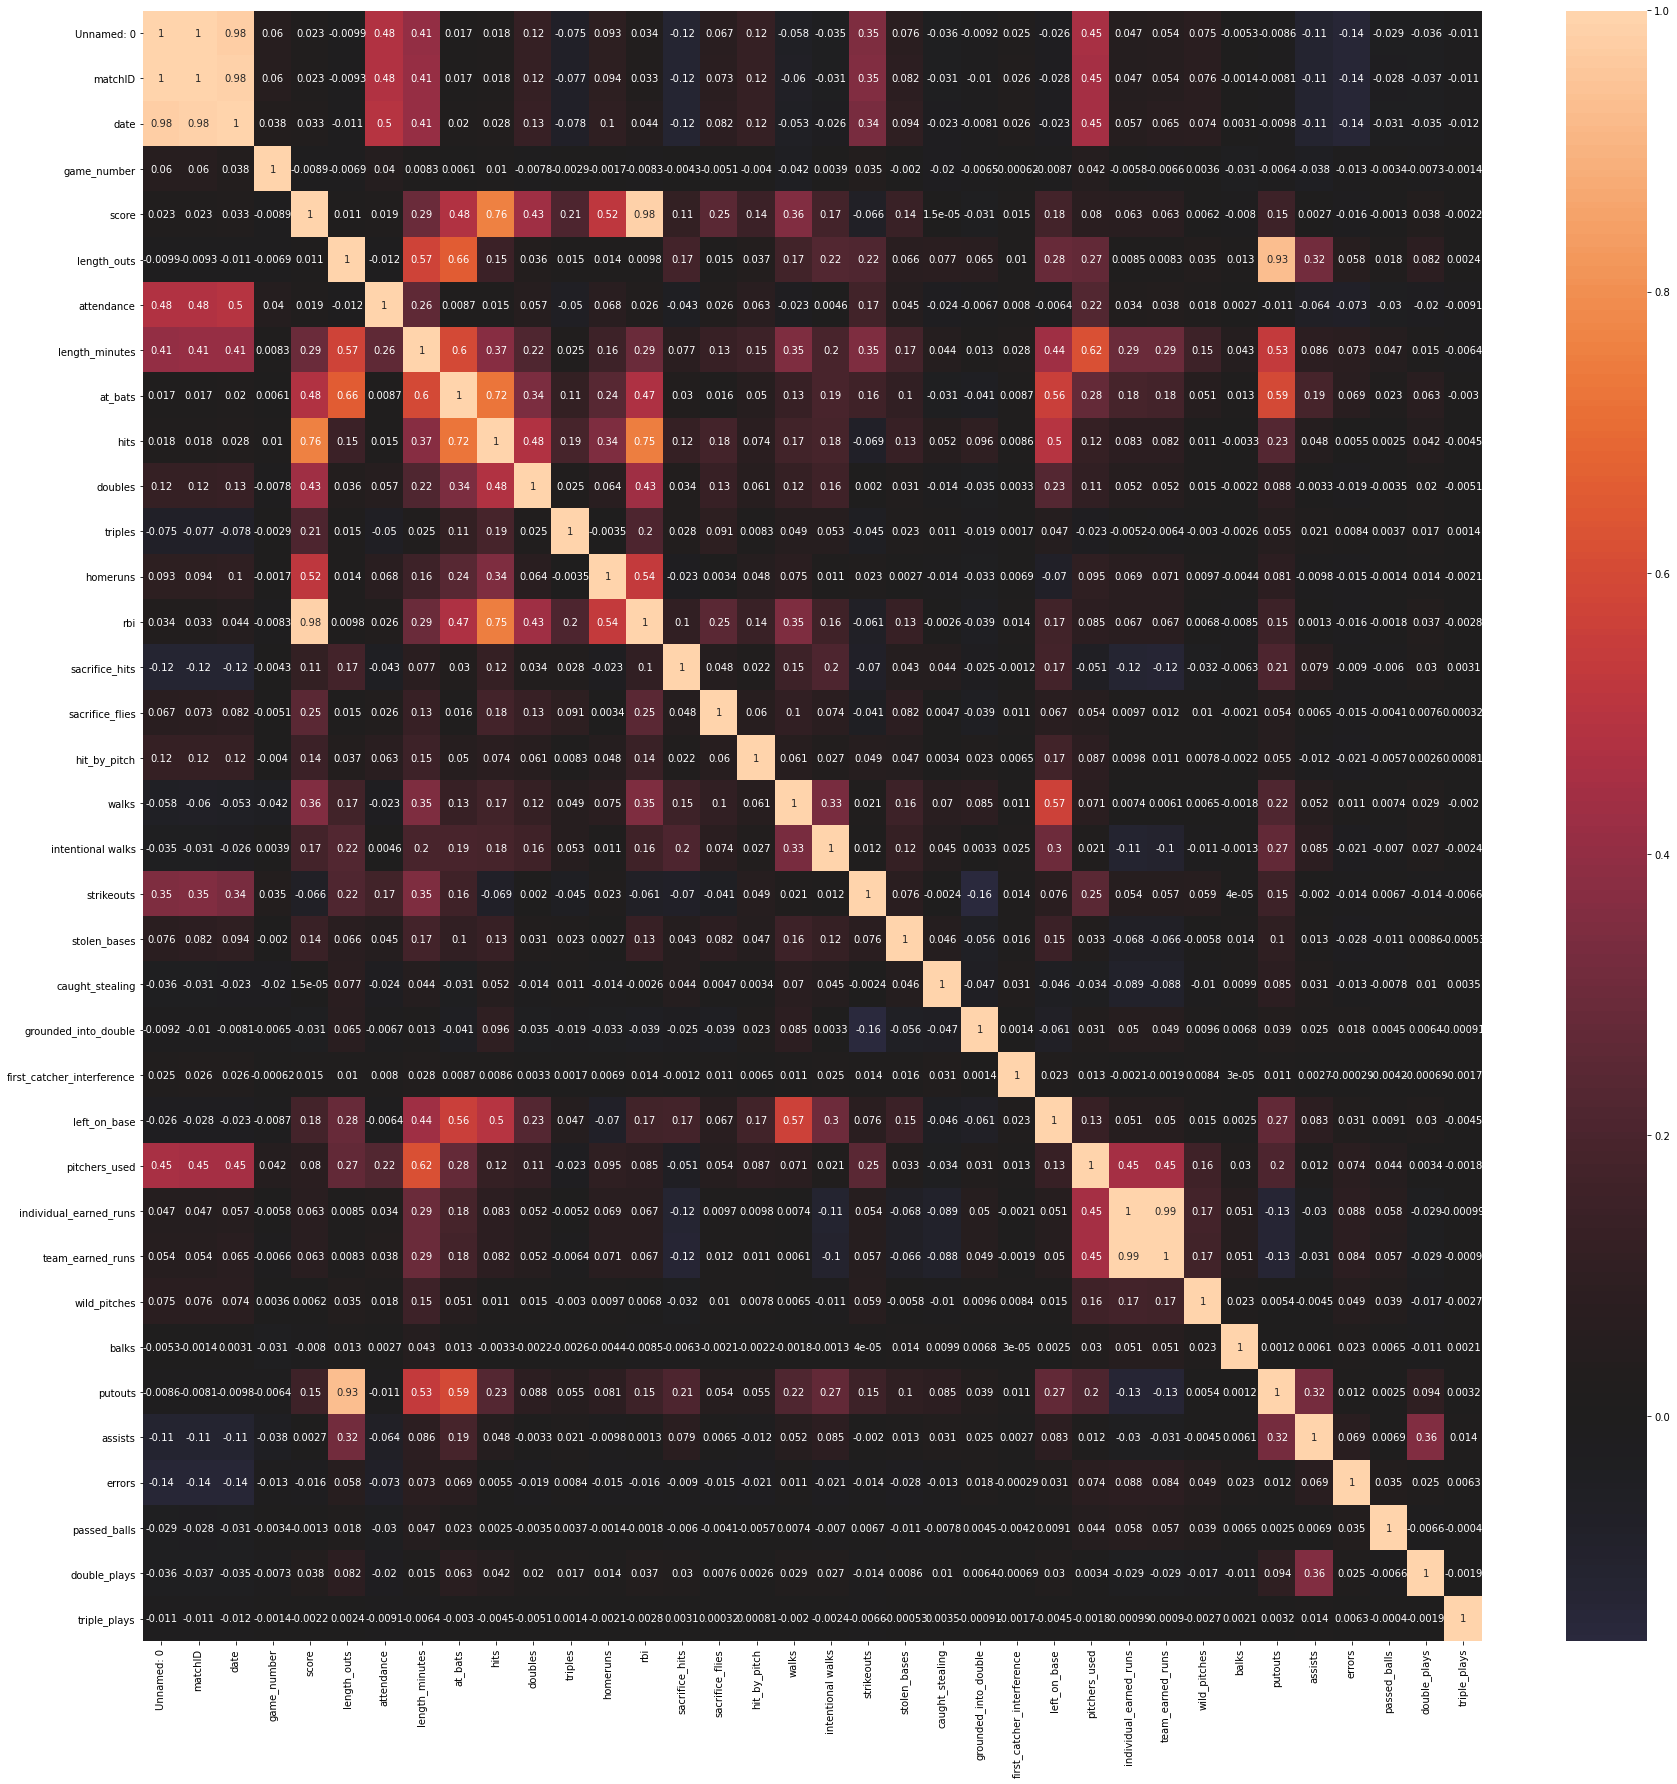

In [61]:
sns.heatmap(X.corr(), center=0, annot=True);

## Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

---
## Decision Tree to identify important features

In [81]:
import matplotlib. pyplot as plt

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (30,30)
from IPython.display import Image
from pydotplus import graph_from_dot_data

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
df = pd.read_csv('df.csv')

In [83]:
for column in df.columns:
    if '_id' in column:
        df.drop(columns=column, inplace=True)

In [84]:
y = df['winner']

# Target and columns not relevant to our business case
X = df.drop(columns=['Unnamed: 0', 'winner', 'league', 'winning_team', 'line_score'])
# Columns dropped after VIF analysis:
X.drop(columns=['matchID', 'score', 'length_outs', 'at_bats', 'putouts'], inplace=True)
# Columns dropped after Feature importance analysis:
X.drop(columns=['name', 'day_night'], inplace=True)


# teams = X['name'].str.get_dummies()
day = X['day_of_week'].str.get_dummies()
# dn = X['day_night'].str.get_dummies()
# X = X.join(teams)
X = X.join(day)
# X = X.join(dn)
X.drop(columns=['day_of_week'], inplace=True)

## Cross Validation  nested in Train_Test_Split and k-fold initiation

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42
                                                   )

X_train, X_validate, y_train, y_validate = train_test_split(X_train,
                                                           y_train,
                                                           test_size=0.3,
                                                           random_state=42
                                                           )

# Initialising K-Folds
kfold = KFold(n_splits=5,
              random_state=42,
              shuffle=True
             )

In [9]:
# Train Decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Accuracy of the Decision Tree classification

In [8]:
clf.score(X_train, y_train)

1.0

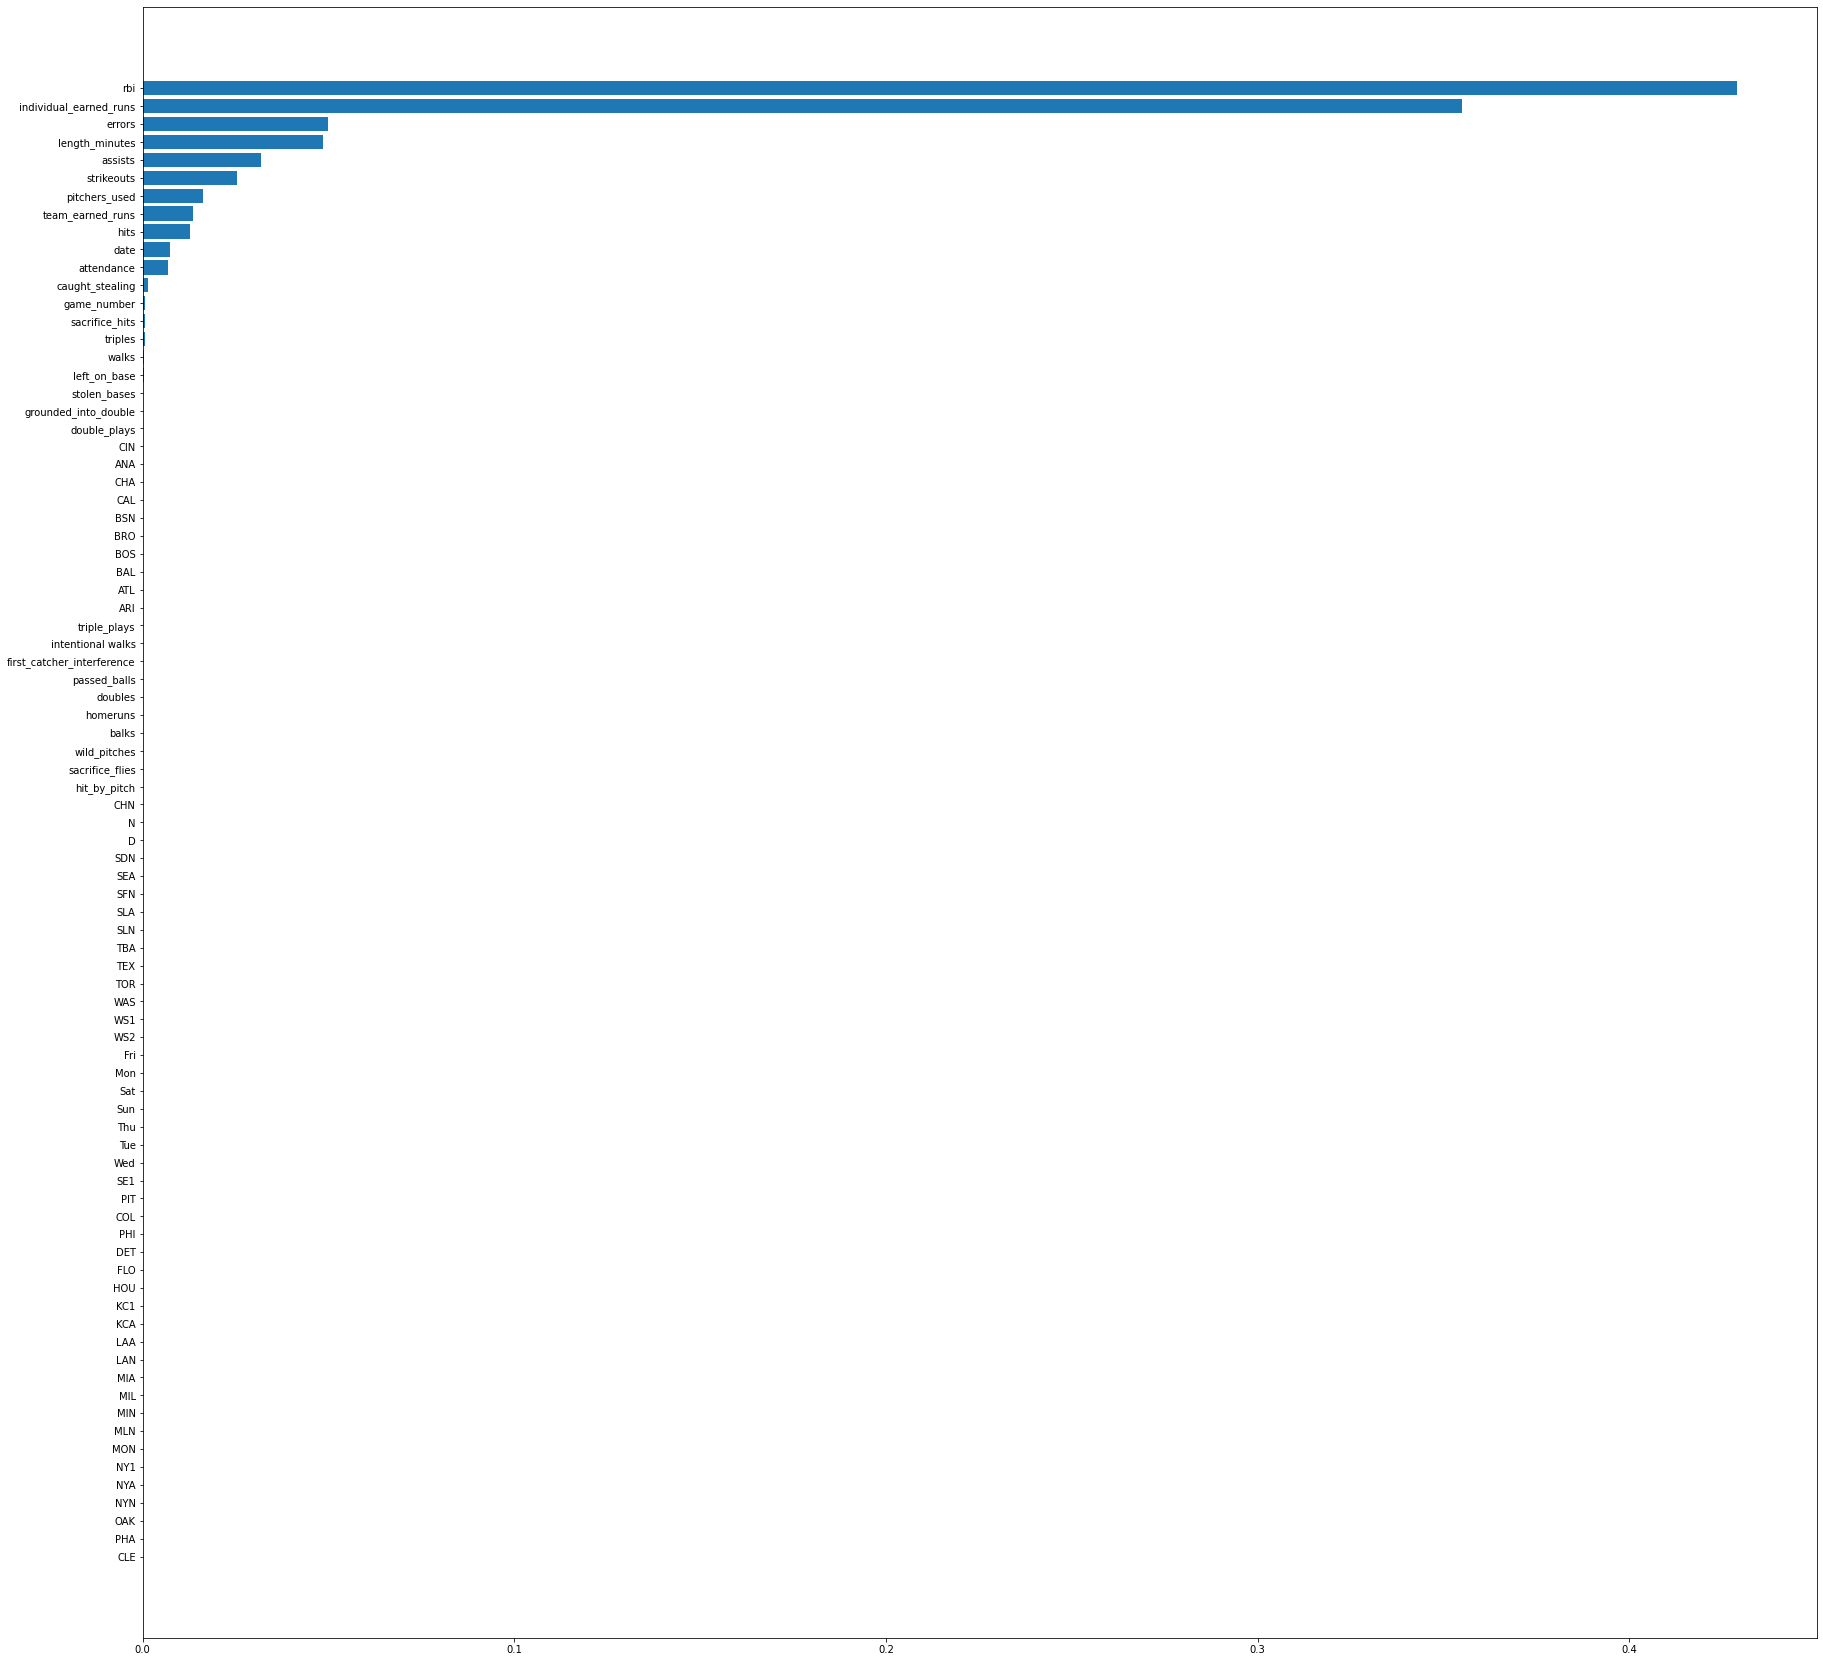

In [77]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)),importances[indices], align='center');
plt.yticks(range(len(indices)), [features[i] for i in indices]);

In [91]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

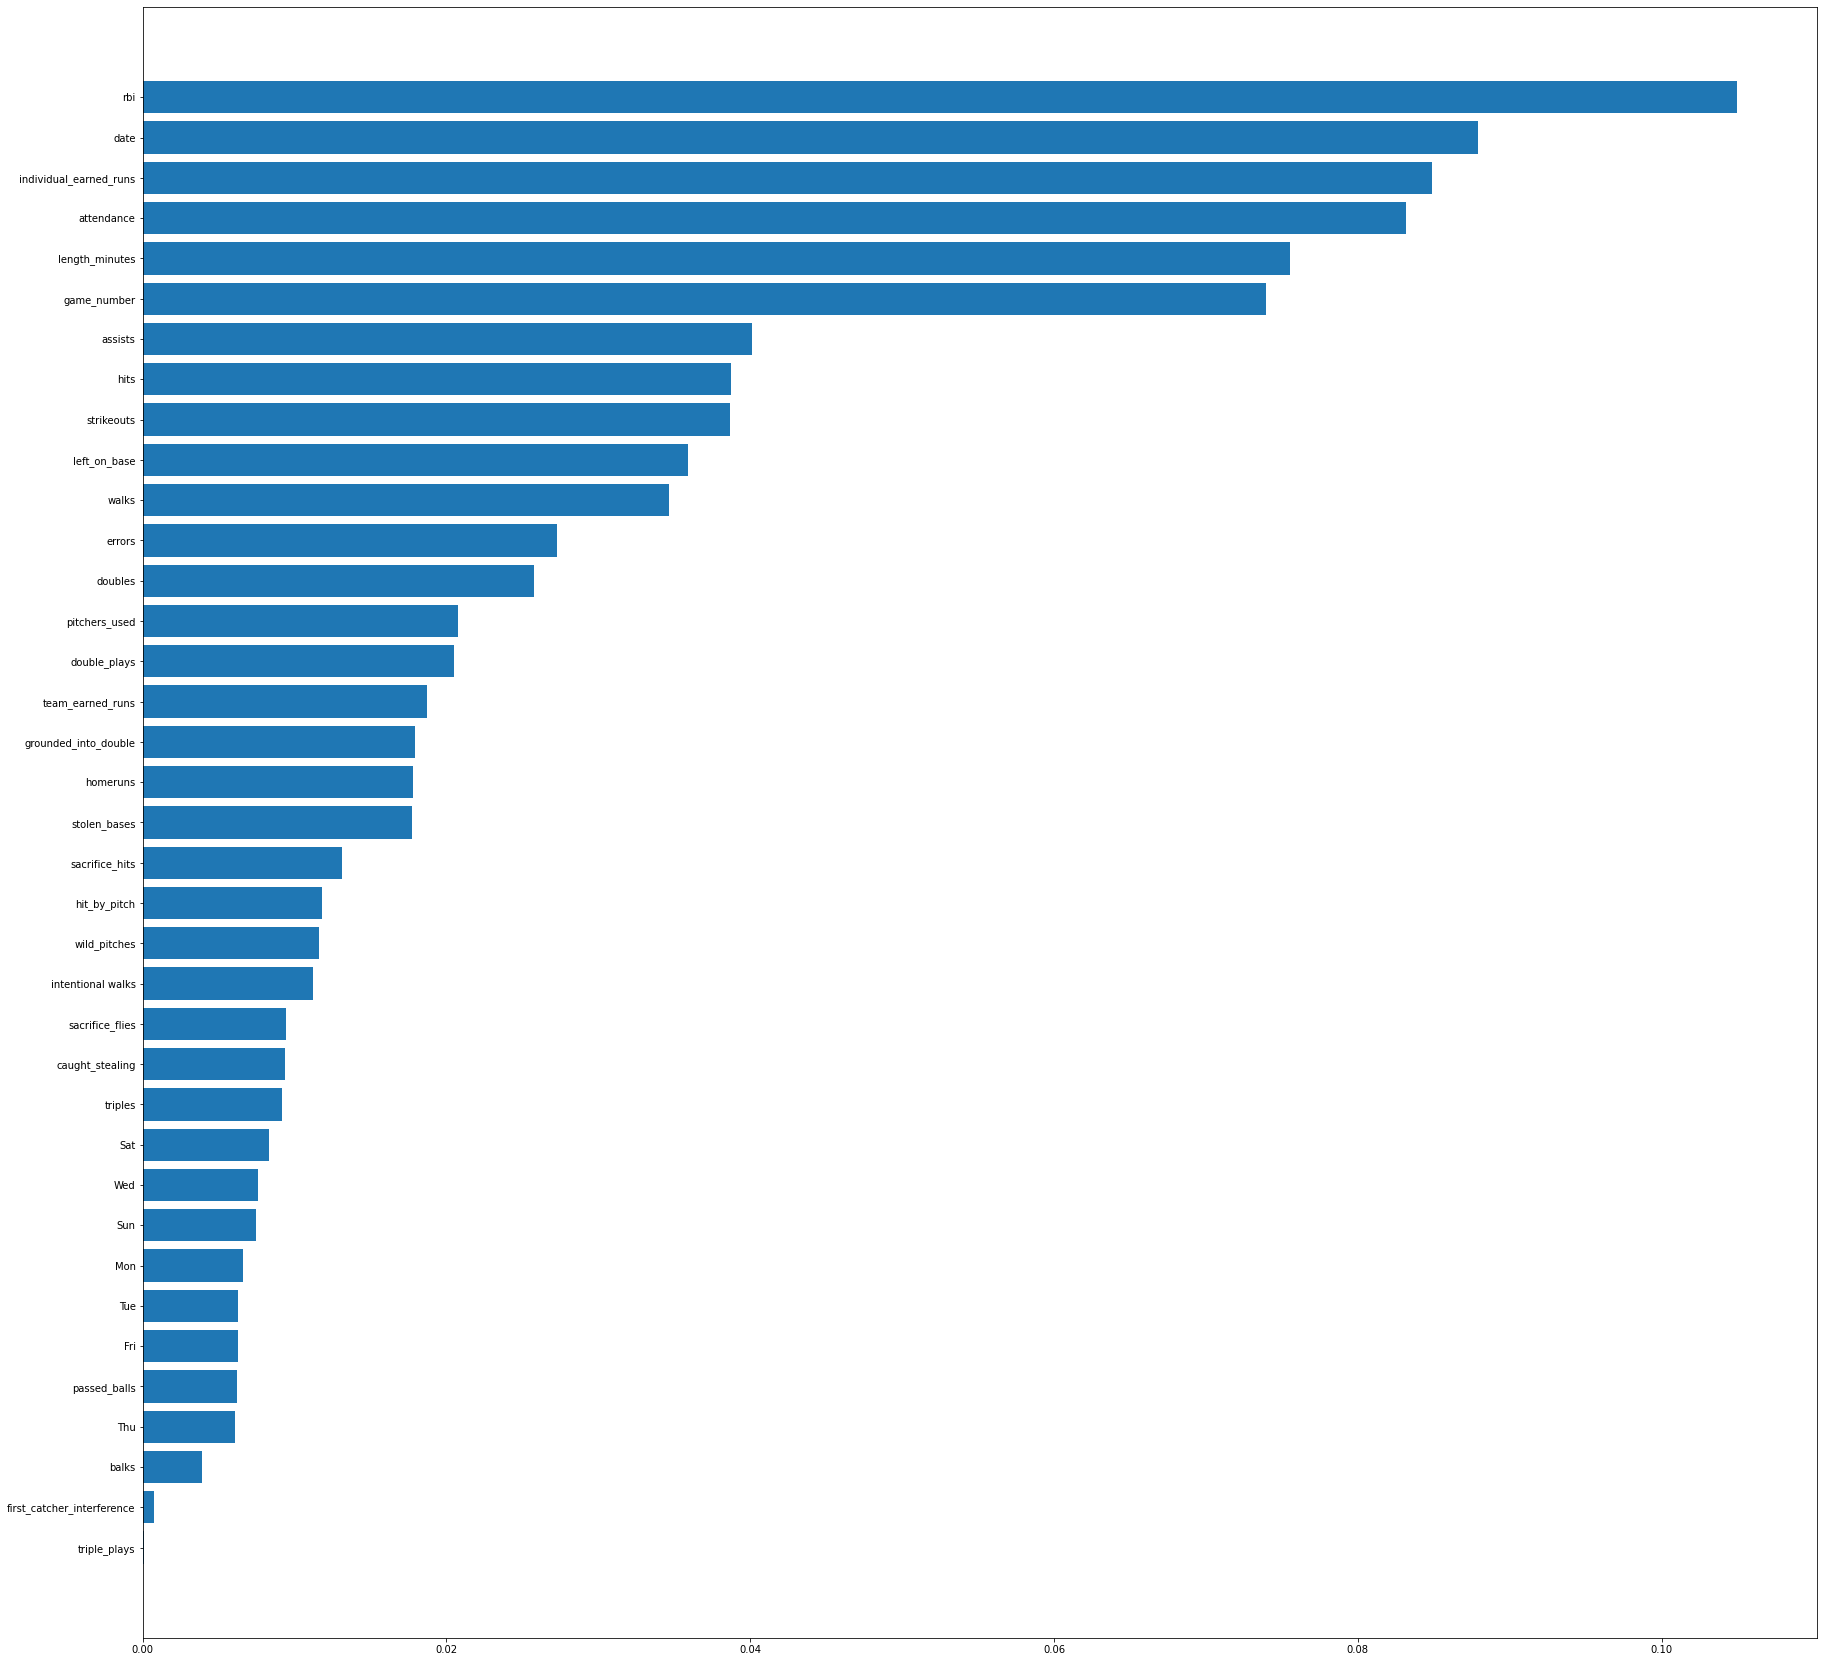

In [92]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)),importances[indices], align='center');
plt.yticks(range(len(indices)), [features[i] for i in indices]);

# Baseline model: logistic regression

In [86]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy of the logistic model

In [87]:
model_log.score(X_train, y_train)

0.5214492542034699

# Decision Tree using get_dummies (and dropping the source column)

Using GridSearchCV to find the bext parameters for our Decision Tree model:

In [59]:
len([x for x in range(2,10)])*len([x for x in range(500,5000,500)])*2

144

In [48]:
param_grid = {'criterion' : ['gini','entropy'],
              'max_depth' : [x for x in range(2,10)],
              'min_samples_leaf' : [x for x in range(500,5000,500)]
             }
dtree = DecisionTreeClassifier()

In [57]:
grid = GridSearchCV(estimator = dtree, 
                    param_grid = param_grid, 
                    scoring = 'accuracy',
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score=True
                   )

In [58]:
grid = grid.fit(X_train, y_train)
criterion = grid.best_params_['criterion']
max_depth = grid.best_params_['max_depth']
min_samples_leaf = grid.best_params_['min_samples_leaf']
print(f'criterion: {criterion}')
print(f'max_depth: {round(max_depth,5)}')
print(f'min_samples_leaf: {round(min_samples_leaf,5)}')
print(f'accuracy: {round(grid.best_score_,5)}')

###################
#     Output:     # With he get_dummies method, removing the source columns
###################
# criterion: gini
# max_depth: 9
# min_samples_leaf: 500
# accuracy: 0.64532

criterion: gini
max_depth: 9
min_samples_leaf: 500
accuracy: 0.64532


In [88]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=500)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
# Graphical representation of the decision tree

export_graphviz(clf,
                out_file='tree.dot', 
                feature_names=X_train.columns,  
                class_names=np.unique(y).astype('str'), 
                filled=True,
                rounded=True,
                special_characters=True,
                precision = 2
                )

In [44]:
from subprocess import Popen, PIPE
Popen('dot -Tpng tree.dot -o tree.png -Gdpi=600', shell=True, stdout=PIPE, stderr=PIPE)

In [89]:
clf.score(X_train, y_train)

0.6535148550989124

In [90]:
clf.score(X_validate, y_validate)

0.6415999545790041

In [45]:
Image(filename='tree.png')

In [79]:
# From the scikit learn doc: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 275 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 8] <= 1.5 else to node 58.
	node=1 test node: go to node 2 if X[:, 8] <= 0.5 else to node 25.
		node=2 test node: go to node 3 if X[:, 3] <= 149.5 else to node 16.
			node=3 test node: go to node 4 if X[:, 25] <= 12.5 else to node 13.
				node=4 test node: go to node 5 if X[:, 3] <= 123.5 else to node 6.
					node=5 leaf node.
					node=6 test node: go to node 7 if X[:, 0] <= 19800819.0 else to node 10.
						node=7 test node: go to node 8 if X[:, 14] <= 5.5 else to node 9.
							node=8 leaf node.
							node=9 leaf node.
						node=10 test node: go to node 11 if X[:, 25] <= 9.5 else to node 12.
							node=11 leaf node.
							node=12 leaf node.
				node=13 test node: go to node 14 if X[:, 3] <= 132.5 else to node 15.
					node=14 leaf node.
					node=15 leaf node.
			node=16 test node: go to node 17 if X[:, 25] <= 11.5 else to node 22.
				node=17 test node: go to nod

## Random Forest

In [53]:
2*len([x for x in range(2,10)])*len([x for x in range(500,5000,500)])*len([x for x in range(10,60,10)])

720

In [56]:
param_grid = {'criterion' : ['gini','entropy'],
              'max_depth' : [x for x in range(2,10)],
              'min_samples_leaf' : [x for x in range(500,5000,500)],
              'n_estimators' : [x for x in range(10,60,10)]
             }
rfc = RandomForestClassifier()

In [57]:
grid = GridSearchCV(estimator = rfc, 
                    param_grid = param_grid, 
                    scoring = 'accuracy',
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score=True
                   )

In [58]:
grid = grid.fit(X_train, y_train)
criterion = grid.best_params_['criterion']
max_depth = grid.best_params_['max_depth']
min_samples_leaf = grid.best_params_['min_samples_leaf']
n_estimators = grid.best_params_['n_estimators']
print(f'criterion: {criterion}')
print(f'max_depth: {round(max_depth,5)}')
print(f'min_samples_leaf: {round(min_samples_leaf,5)}')
print(f'n_estimators: {n_estimators}')
print(f'accuracy: {round(grid.best_score_,5)}')

criterion: gini
max_depth: 9
min_samples_leaf: 500
n_estimators: 30
accuracy: 0.63459


# Decision Tree using OneHotEncoder

In [27]:
import matplotlib

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (30,30)
from IPython.display import Image
from pydotplus import graph_from_dot_data

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
df = pd.read_csv('df.csv')

In [29]:
for column in df.columns:
    if '_id' in column:
        df.drop(columns=column, inplace=True)

In [30]:
df.head()

Unnamed: 0  matchID      date day_of_week name league  game_number  score  \
0           0        0  19460416         Tue  DET     AL            1      2   
1          10       10  19460417         Wed  PHA     AL            2      7   
2          16       16  19460418         Thu  DET     AL            3      6   
3          19       19  19460418         Thu  BRO     NL            3      8   
4          23       23  19460420         Sat  BOS     AL            4      2   

   length_outs day_night  attendance  length_minutes line_score  at_bats  \
0           51         D     52900.0           110.0  01010000x     28.0   
1           51         D     11901.0           120.0  10000051x     31.0   
2           51         D     16469.0           118.0  10030011x     36.0   
3           51         D     31825.0           136.0  00512000x     32.0   
4           51         D     30446.0            94.0  10000001x     24.0   

   hits  doubles  triples  homeruns  rbi  sacrifice_hits  sacrifice_flies  \
0   6.0      1.0      0.0       1.0  2.0             0.0              0.0   
1   9.0      2.0      1.0       0.0  6.0             3.0              0.0   
2  12.0      3.0      1.0       0.0  6.0             0.0              0.0   
3   9.0      1.0      2.0       0.0  6.0             0.0              0.0   
4   2.0      0.0      0.0       1.0  2.0             1.0              0.0   

   hit_by_pitch  walks  intentional walks  strikeouts  stolen_bases  \
0           0.0    5.0                1.0         4.0           0.0   
1           0.0    2.0                0.0         3.0           1.0   
2           0.0    6.0                1.0         5.0           0.0   
3           0.0    4.0                0.0         5.0           5.0   
4           0.0    6.0                0.0         3.0           0.0   

   caught_stealing  grounded_into_double  first_catcher_interference  \
0              0.0                   2.0                         0.0   
1              0.0                   0.0                         0.0   
2              0.0                   0.0                         0.0   
3              1.0                   0.0                         0.0   
4              0.0                   0.0                         0.0   

   left_on_base  pitchers_used  individual_earned_runs  team_earned_runs  \
0           7.0            1.0                     1.0               1.0   
1           5.0            1.0                     1.0               1.0   
2          12.0            1.0                     1.0               1.0   
3           4.0            1.0                     1.0               1.0   
4           5.0            1.0                     1.0               1.0   

   wild_pitches  balks  putouts  assists  errors  passed_balls  double_plays  \
0           0.0    0.0     27.0     13.0     0.0           0.0           1.0   
1           0.0    0.0     27.0     10.0     0.0           0.0           2.0   
2           0.0    0.0     27.0     17.0     0.0           0.0           0.0   
3           0.0    0.0     27.0      5.0     1.0           0.0           1.0   
4           0.0    0.0     27.0      8.0     0.0           0.0           1.0   

   triple_plays winning_team  winner  
0           0.0         Home     1.0  
1           0.0         Home     1.0  
2           0.0         Home     1.0  
3           0.0         Home     1.0  
4           0.0         Home     1.0

In [33]:
y = df['winner']
X = df.drop(columns=['Unnamed: 0', 'winner', 'league', 'winning_team', 'line_score', 'name', 'league'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42
                                                   )
# Initialising K-Folds
kfold = KFold(n_splits=5,
              random_state=42,
              shuffle=True
             )

In [24]:
ohe = OneHotEncoder()
ohe.fit(X_train[])
X_train_ohe = ohe.transform(X_train).reshape(-1,1)

In [26]:
# Train Decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_ohe, y_train)

ValueError: No support for np.int64 index based sparse matrices

### Confusion matrix for the model selected

In [ ]:
pred = model.predict(X_test)
print(confusion_matrix(X_test, pred))